Predict if an industry experienced student enrolled in a course is interested in a job change

__Zeta Analytics__ is a training institute that conducts training for analytics/ data science and wants to expand its business to manpower recruitment as well. 
They get a large number of signups for their training. Now, Zeta Analytics wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are looking for new employment. They have student information related to demographics, education, experience, and features related to training as well.

__To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee looking for a new job ( 0 or 1).__

So firstly let's upload our dataset and view it

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading data
df = pd.read_csv('Zeta_Analytics Dataset.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


Let's quickly view the names of the columns present and columns with missing data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

There are a lot of columns with missing data, and some numerical columns are shown as categorical, so we need to do data preprocessing.

# Data Preprocessing

Let's begin data pre-processing with fixing the null values first, just like we did for the earlier regression model as well.

In [4]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Number of columns with nans: 8


In [5]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


Next, let's replace the categorical columns with null values or NaN using 'NA' to indicate Not Available

In [6]:
cat_miss_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline','company_size', 'company_type']

In [7]:
for col in cat_miss_cols:
    print(df[col].unique())

['Male' nan 'Female' 'Other']
['no_enrollment' 'Full time course' 'Part time course' nan]
['Graduate' 'Masters' 'High School' 'Phd' nan 'Primary School']
['STEM' 'Other' 'No Major' nan 'Business Degree' 'Arts' 'Humanities']
['100-500' '<10' '50-99' nan '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
['Pvt Ltd' 'Funded Startup' 'Public Sector' nan 'Early Stage Startup'
 'NGO' 'Other']


In [8]:
df[cat_miss_cols] = df[cat_miss_cols].fillna('NA')

Let's quickly verify if the changes have taken effect.

In [9]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['experience', 'last_new_job']
Number of columns with nans: 2


Now lets move to numerical columns with missing values

In [10]:
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' nan '20']
['1' '2' '3' '>4' 'never' '4' nan]


Looks like some of our columns such as experience and last_new_job have a mix of characters and numbers. Let's replace them with text.

## Replace text data with numbers in some of the columns which have numerical values

So lets clip > and < to the highest or lowest range values and replace 'never' with 0.

In [11]:
for column in num_miss_cols:
    # This will replace any '>' or '<' with an empty string
    df[column] = df[column].astype(str).str.replace('>', '').astype(str).str.replace('<', '')
    df[column] = df[column].astype(str).str.replace('never', '0')

Let's quickly verify it the changes have been completed

In [12]:
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '19' '18' '17' 'nan']
['1' '2' '3' '4' '0' 'nan']


Since these columns had strings before cleaning they are not being read as numeric columns. Lets convert them to numeric. 

In [13]:
for col in num_miss_cols:
    df[col] = pd.to_numeric(df[col].replace('nan', np.NaN))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  18359 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18359 non-null  object 
 6   education_level         18359 non-null  object 
 7   major_discipline        18359 non-null  object 
 8   experience              18300 non-null  float64
 9   company_size            18359 non-null  object 
 10  company_type            18359 non-null  object 
 11  last_new_job            17992 non-null  float64
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(3), int64(3), object(8)
mem

In [15]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['experience', 'last_new_job']
Number of columns with nans: 2


For these 2 columns experience and last job, the idea is to fill them using a median value since they are key features and replacing them with zeroes may impact the model performance. We will do this with median from train data, after splitting the dataset, to prevent data leakage. 

## Transform data in the categorical columns by converting then into numerical form, for use with ML algorithms

In [16]:
cat_cols = df.select_dtypes(include='O').columns
cat_cols

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [17]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())

city
123
gender
4
relevent_experience
2
enrolled_university
4
education_level
6
major_discipline
7
company_size
9
company_type
7


In these columns, thec column "City" has too many categories, which may not add any value as such to the models training. We will be dropping it. You may try to see the performnace by using this columns as well. Also the column "Enrollee_id" is an ID column, that too can be dropped.

In [18]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)
cat_cols = df.select_dtypes(include='O').columns


In [19]:
for col in cat_cols:
    print(col)
    print(df[col].unique())

gender
['Male' 'NA' 'Female' 'Other']
relevent_experience
['Has relevent experience' 'No relevent experience']
enrolled_university
['no_enrollment' 'Full time course' 'Part time course' 'NA']
education_level
['Graduate' 'Masters' 'High School' 'Phd' 'NA' 'Primary School']
major_discipline
['STEM' 'Other' 'No Major' 'NA' 'Business Degree' 'Arts' 'Humanities']
company_size
['100-500' '<10' '50-99' 'NA' '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
company_type
['Pvt Ltd' 'Funded Startup' 'Public Sector' 'NA' 'Early Stage Startup'
 'NGO' 'Other']


Further, over here columns like  "education level" and "company size" have a clear order, and will be transformed using an ordinal encoder, with NA in between. Others will be transformed using One hot encoder. 
An ordinal encoder is a technique used to convert categorical data into integer codes, ranging from 0 to n-1, where n is the number of unique categories for the feature. Unlike one-hot encoding, which creates a new binary column for each category, ordinal encoding maintains a single column and assigns a unique integer to each category in an order.

In [20]:
from sklearn.preprocessing import  OrdinalEncoder

In [21]:
oc = OrdinalEncoder(
    categories= [['Primary School', 'High School', 'NA','Graduate', 'Masters', 'Phd' ]])
df[['education_level']] = oc.fit_transform(df[['education_level']])
oc.categories_

[array(['Primary School', 'High School', 'NA', 'Graduate', 'Masters',
        'Phd'], dtype=object)]

In [22]:
oc2 = OrdinalEncoder(
    categories= [[ '<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999', '5000-9999', '10000+']])
df[['company_size']] = oc2.fit_transform(df[['company_size']])
oc2.categories_

[array(['<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999',
        '5000-9999', '10000+'], dtype=object)]

In [23]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_NA,gender_Other,...,major_discipline_NA,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NA,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.689,3.0,3.0,3.0,1.0,106,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.923,3.0,14.0,0.0,1.0,69,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.910,3.0,6.0,2.0,2.0,4,0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.666,3.0,14.0,2.0,1.0,26,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.887,4.0,8.0,5.0,2.0,88,1,False,True,False,...,False,False,False,True,False,True,False,False,False,False


That brings us to the end of pre-processing. Let's now split our data into train and test data in the ratio 80:20.

# Create the train and test dataset, by splitting the input dataframe in the ratio 80:20

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
# test_size of 0.2 means train_size is 80% and test_size is 20$
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Next like we explained earlier let's fill missing values in numercial columns with median and then proceed to normalize it.

In [26]:
exp_median = X_train['experience'].median()
print(exp_median)

X_train.fillna({'experience': exp_median}, inplace=True)
X_test.fillna({'experience': exp_median}, inplace=True)

lnj_median = X_train['last_new_job'].median()
print(lnj_median)

X_train.fillna({'last_new_job': exp_median}, inplace=True)
X_test.fillna({'last_new_job': exp_median}, inplace=True)


9.0
1.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Normalize data by scaling the train and test datasets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values


For this data, let's quickly view the data distribution of target. This is in order to understand which evaluation metric to choose. 

In [30]:
df.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

The dataset is imbalanced. So we can use a metric like auc score as the metric for this problem.

# Define the classes for our dataset and for the Neural Network

Let's now go ahead and define our neural network. Ensure you import the necessary libraries before you begin defining the network.

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [31]:
# Encapsulate out dataset as a class, which inherits from the torch Dataset class
class JobChangeDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [32]:
# Define the neural network Model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.sigmoid(self.layer4(x))
        return x


So now we've designed a fully connected dense neural network for our binary classification task. It consists of four layers with ReLU activation functions applied to the first three layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].

With our neural network defined and data ready, let's convert the numpy arrays to pytorch tensors.

In [33]:
import torch
# Convert numpy to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the function to train our NN model and evaluate it

Next i'm going to run the code to train our neural network model. Here yet again we are going to define our model inside a function train_and_evaluate model. This model will use a BCE loss function which is the mostly commonly used loss function for binary classification problems. It will then optimize and backwardpropogate the losses after which the values will be printed for every 10 epochs for both train and the test data. Additionally this function will also plot the train and test loss acoss epochs. This will help us to evaluate the presence of overfitiing.

In [34]:
# Training and Evaluation Loop
def train_and_evaluate_model(model, optimizer, batch_size = 128, epochs=25, print_every=5):
    model.train()  # set model to train mode

    train_loss_list=[]
    test_loss_list = []

    # Convert the tensor based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor, y_train_tensor)
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = JobChangeDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            outputs = model(features) # pass our data(input features) through the model
            loss = criterion(outputs.squeeze(), labels) # calculate the loss between model outputs and expected labels
            loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
            optimizer.step() # Perform a single optimization step (parameter update)
            train_loss += loss.item() # Accumulate the training loss to later calculate the average
        
        # Calculate the average training loss for current epoch
        train_loss = train_loss / len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on test set
        model.eval() # Switch model to evaluation mode


        
        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            # Iterate over the test dataset
            for features, labels in test_loader:
                outputs = model(features) # Forward pass: compute the output of the model by passing the input features
                loss = criterion(outputs.squeeze(), labels) # Calculate the loss between the model output and expected labels
                test_loss += loss.item() # Accumulate the test loss to later calculate the average
            train_auc = roc_auc_score(y_train_tensor, model(X_train_tensor))
            test_auc = roc_auc_score(y_test_tensor, model(X_test_tensor))
        
        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')

    plt.plot(range(epochs),train_loss_list, label = 'train')
    plt.plot(range(epochs),test_loss_list, label = 'test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    plt.show()

    
    

## Train the model with the SGD optimizer

Let's use an SGD optimizer and re-run this code to check if the performance improves or not. 

Epoch 10/100,Train Loss: 0.3733, Test Loss: 0.3827, Train Auc: 0.6485, Test Auc: 0.6454
Epoch 20/100,Train Loss: 0.3713, Test Loss: 0.3816, Train Auc: 0.6587, Test Auc: 0.6484
Epoch 30/100,Train Loss: 0.3693, Test Loss: 0.3825, Train Auc: 0.6653, Test Auc: 0.6485
Epoch 40/100,Train Loss: 0.3679, Test Loss: 0.3822, Train Auc: 0.6716, Test Auc: 0.6476
Epoch 50/100,Train Loss: 0.3668, Test Loss: 0.3833, Train Auc: 0.6783, Test Auc: 0.6482
Epoch 60/100,Train Loss: 0.3653, Test Loss: 0.3851, Train Auc: 0.6837, Test Auc: 0.6485
Epoch 70/100,Train Loss: 0.3628, Test Loss: 0.3849, Train Auc: 0.6902, Test Auc: 0.6488
Epoch 80/100,Train Loss: 0.3616, Test Loss: 0.3846, Train Auc: 0.6995, Test Auc: 0.6408
Epoch 90/100,Train Loss: 0.3602, Test Loss: 0.3899, Train Auc: 0.7054, Test Auc: 0.6481
Epoch 100/100,Train Loss: 0.3570, Test Loss: 0.3862, Train Auc: 0.7115, Test Auc: 0.6439


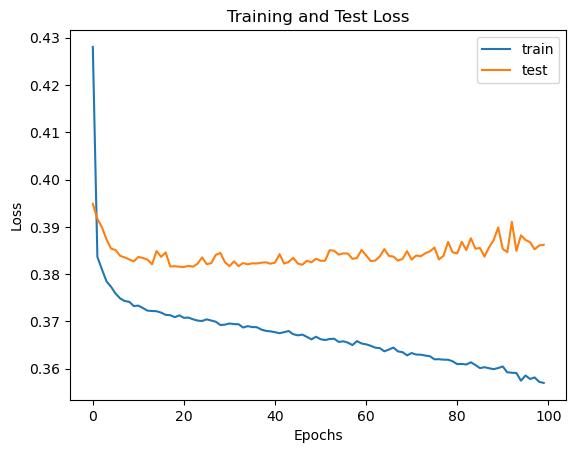

In [35]:
# We have to create a new model class here due the pass-by-reference feature of python functions
model = BinaryClassifier()
# Initialize SGD optimizer
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

The AUROC scores for this model after 100 epochs using SGD optimizer stand at VALUE on the train data and VALUE on the test data. Notice how the score does not improve significantly on test set after 10 epochs, but keeps on increasing on the train set. The model is clearly overfitting and noticeably the test loss on the epochs is also increasing gradually after 40 epochs. Moreover, there were certain epochs earlier in the training where the score was slightly better on the test set, but then decreased marginally. We could have stopped the training when the performance was best. We will learn about this in the next module.  Let's check if using Adam optimizer improves this score and can reduce the overfitting here. 

## Train the model with the Adam optimizer

Epoch 10/100,Train Loss: 0.3648, Test Loss: 0.3958, Train Auc: 0.6915, Test Auc: 0.6412
Epoch 20/100,Train Loss: 0.3507, Test Loss: 0.3950, Train Auc: 0.7306, Test Auc: 0.6167
Epoch 30/100,Train Loss: 0.3392, Test Loss: 0.4233, Train Auc: 0.7488, Test Auc: 0.6035
Epoch 40/100,Train Loss: 0.3222, Test Loss: 0.4519, Train Auc: 0.7871, Test Auc: 0.5957
Epoch 50/100,Train Loss: 0.3034, Test Loss: 0.5164, Train Auc: 0.8122, Test Auc: 0.5886
Epoch 60/100,Train Loss: 0.2824, Test Loss: 0.5790, Train Auc: 0.8390, Test Auc: 0.5876
Epoch 70/100,Train Loss: 0.2655, Test Loss: 0.6703, Train Auc: 0.8688, Test Auc: 0.5712
Epoch 80/100,Train Loss: 0.2457, Test Loss: 0.7663, Train Auc: 0.8923, Test Auc: 0.5476
Epoch 90/100,Train Loss: 0.2300, Test Loss: 0.8912, Train Auc: 0.9001, Test Auc: 0.5564
Epoch 100/100,Train Loss: 0.2223, Test Loss: 0.9213, Train Auc: 0.9133, Test Auc: 0.5401


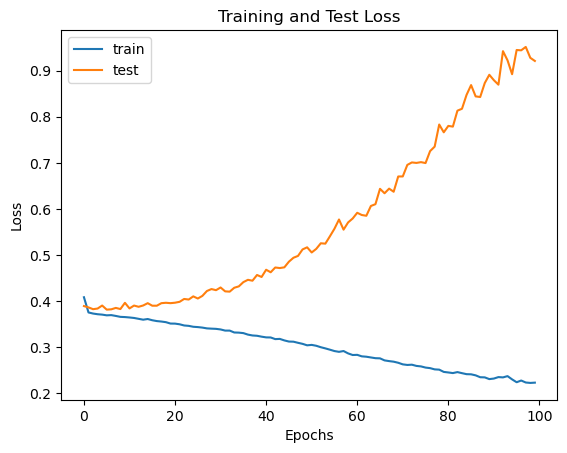

In [36]:
model = BinaryClassifier()
# Initialize SGD optimizer
opt = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

__HERE EVEN MORE  EXTREME INC IN TEST LOSS__

As you can see, the model is even more  overfitting as the number of epochs are increasing. The test loss is increasing exponentially after 40 epochs.  Deep Neural networks often get into these kind of problems. 

To solve these problems, let's move onto our next module "Improving deep learning networks" where we shall learn to improve the models performance. I'll see you there!